<a href="https://colab.research.google.com/github/sachinkun21/OpenCV/blob/master/MTCNN%2BResnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [ ]:
pwd

'/content'

[74, 265, 81, 105]
[344, 205, 72, 89]
[434, 251, 95, 124]
[33, 247, 47, 56]


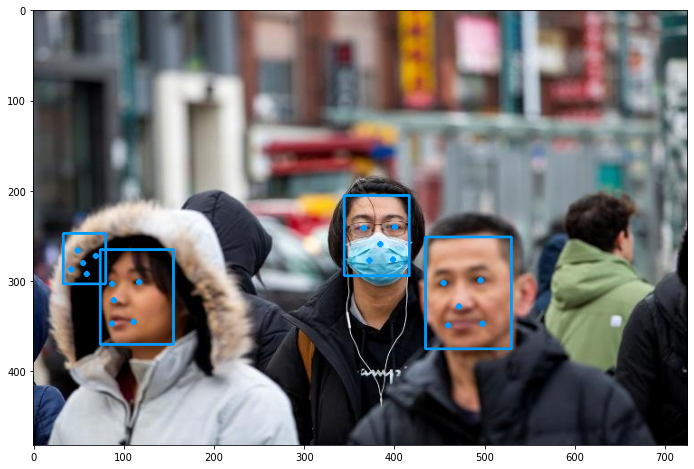

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import cv2

img = cv2.cvtColor(cv2.imread("ivan.jpg"), cv2.COLOR_BGR2RGB)

detector = MTCNN()

image = cv2.cvtColor(cv2.imread("ivan.jpg"), cv2.COLOR_BGR2RGB)
results = detector.detect_faces(image)

# Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
for i in range(len(results)):
  bounding_box = results[i]['box']
  keypoints = results[i]['keypoints']
  print(bounding_box)
  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                (0,155,255),2)

  cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

#cv2.imshow("ivan_drawn.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

plt.figure(figsize = (12,8))
plt.imshow(image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the necessary packages
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os

In [ ]:
weightsPath  = '/content/drive/My Drive/datasets/keras_models.hdf5'

In [ ]:
model = load_model(weightsPath)

AttributeError: ignored

In [ ]:
# model.summary()

In [ ]:
demo_image = '/content/drive/My Drive/DataScience/face-mask-detector/
image = cv2.imread('206.jpg')
orig = image.copy()
(h, w) = image.shape[:2]

No Mask


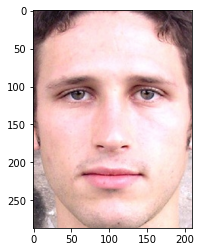

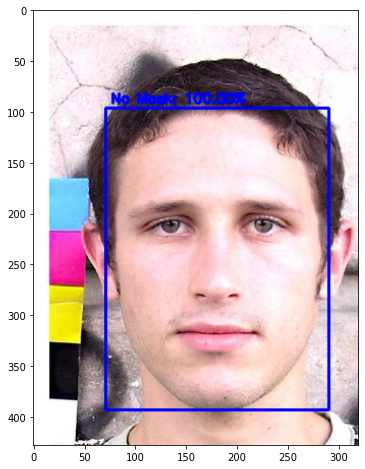

In [ ]:
%matplotlib inline
detector = MTCNN()

# reading image
image = cv2.cvtColor(cv2.imread("206.jpg"), cv2.COLOR_BGR2RGB)

results = detector.detect_faces(image)

# Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
for i in range(len(results)):
    bounding_box = results[i]['box']
    (x, y, w, h) = bounding_box
    # face = image[startY:endY, startX:endX]
    face = image[y:y+h, x:x+w]
    plt.imshow(face)
    
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224, 224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)

    # pass the face through the model to determine if the face has a mask or not
    (mask, withoutMask) = model.predict(face)[0]
    label = "Mask" if mask > withoutMask else "No Mask"
    print(label)
    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

    # include the probability in the label
    label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
    
    startX, startY, endX, endY = x,y,x+w,y+h
    cv2.putText(image, label, (startX, startY - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2) 
    cv2.rectangle(image, (startX-5, startY-5), (endX+5, endY+5), color, 2)

plt.figure(figsize = (12,8))
plt.imshow(image)

In [ ]:
%matplotlib inline
detector = MTCNN()

def detect_and_plot(image_path):
  # reading image
  image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

  results = detector.detect_faces(image)

  # Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
  for i in range(len(results)):
      bounding_box = results[i]['box']
      (x, y, w, h) = bounding_box
      # face = image[startY:endY, startX:endX]
      face = image[y:y+h, x:x+w]
      #plt.imshow(face)
      
      face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
      face = cv2.resize(face, (224, 224))
      face = img_to_array(face)
      face = preprocess_input(face)
      face = np.expand_dims(face, axis=0)

      # pass the face through the model to determine if the face has a mask or not
      (mask, withoutMask) = model.predict(face)[0]
      label = "Mask" if mask > withoutMask else "No Mask"
      #print(label)
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

      # include the probability in the label
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      
      startX, startY, endX, endY = x,y,x+w,y+h
      cv2.putText(image, label, (startX, startY - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2) 
      cv2.rectangle(image, (startX-5, startY-5), (endX+5, endY+5), color, 2)

  plt.figure(figsize = (12,8))
  plt.imshow(image)

In [ ]:
from imutils import paths

demo_images = '/content/drive/My Drive/DataScience/face-mask-detector/validation'
image_paths = list(paths.list_images(demo_images))
print(image_paths)

['/content/drive/My Drive/DataScience/face-mask-detector/validation/maskDemo3.jpg', '/content/drive/My Drive/DataScience/face-mask-detector/validation/maskDemo2.jpg', '/content/drive/My Drive/DataScience/face-mask-detector/validation/maskDemo.jpg']


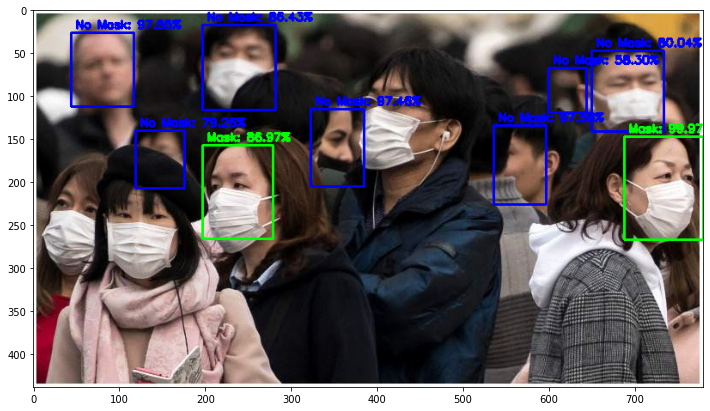

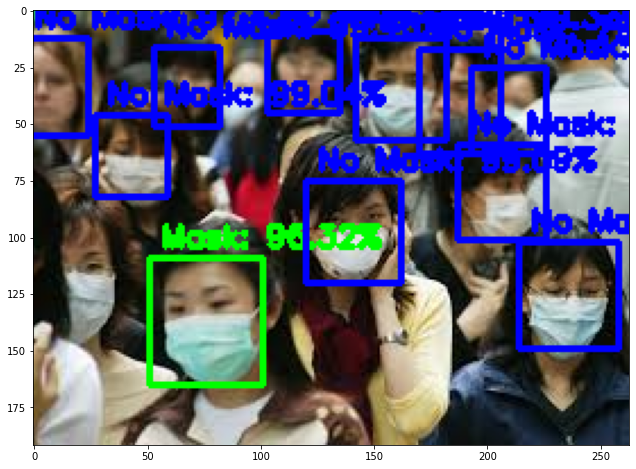

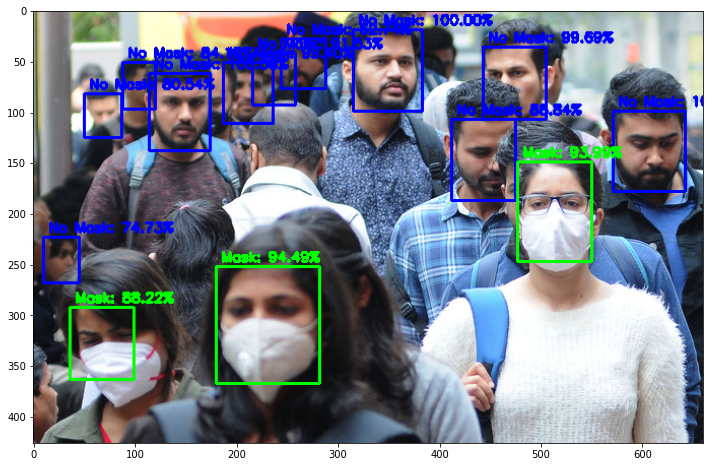

In [ ]:
for demo_image in image_paths:
  detect_and_plot(demo_image)

In [ ]:
face = cv2.imread("0.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
face = cv2.resize(face, (224, 224))
face = img_to_array(face)
face = preprocess_input(face)
face = np.expand_dims(face, axis=0)
face.shape

In [ ]:
# pass the face through the model to determine if the face has a mask or not
(mask, withoutMask) = model.predict(face)[0]

# determine the class label and color we'll use to draw the bounding box and text
label = "Mask" if mask > withoutMask else "No Mask"
color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

# include the probability in the label
label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
label

In [ ]:
cv2.putText(image, label, (startX, startY - 10),
cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

In [ ]:
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)